In [16]:
import numpy as np
from load_data import load_deap_data
from physiological.preprocessing import physiological_preprocessing
import heartpy as hp
import matplotlib.pyplot as plt
import csv


PART_SECONDS = 1
LABEL_TYPE = "arousal"
PPG_SAMPLING_RATE = 128
IGNORE_TIME = 8

In [13]:
def plot_deap_data():
    # Loading deap dataset
    ppg_data, labels = \
        load_deap_data(label_type=LABEL_TYPE)

    all_processed_physiological = []
    for p in range(ppg_data.shape[0]):
        all_trials_physiological = []
        for t in range(ppg_data.shape[1]):
            
            # preprocessing
            # Ignores IGNORE_TIME seconds from the start of each trial
            data = ppg_data[p, t, 0, IGNORE_TIME*PPG_SAMPLING_RATE:]
            preprocessed_physiological = \
                physiological_preprocessing(data,
                                            sampling_rate=PPG_SAMPLING_RATE)

            all_trials_physiological.append(preprocessed_physiological)

        all_processed_physiological.append(all_trials_physiological)
    ppg_data = np.array(all_processed_physiological)
    return ppg_data

In [14]:
# using heartpy plotting utils for visulazation
wd, m = hp.process(plot_deap_data(3,4), PPG_SAMPLING_RATE)
plot_object = hp.plotter(wd, m, show=True, title='some awesome title')

TypeError: plot_deap_data() takes 0 positional arguments but 2 were given

In [15]:
features = plot_deap_data()

for i in range(32):
    for j in range(40):
        wd, m = hp.process(features[i,j,:], PPG_SAMPLING_RATE)
        print(m)

(32, 40, 1, 8064)
(32, 40)
{'bpm': 65.29106628242074, 'ibi': 918.9618644067797, 'sdnn': 49.59653959231896, 'sdsd': 21.4098237998982, 'rmssd': 39.67727434108763, 'pnn20': 0.7068965517241379, 'pnn50': 0.15517241379310345, 'hr_mad': 31.25, 'sd1': 28.032779179587422, 'sd2': 63.825950449661256, 's': 5620.996558836239, 'sd1/sd2': 0.4392066076900262, 'breathingrate': 0.36666666666666664}
{'bpm': 58.948587979724834, 'ibi': 1017.8360849056604, 'sdnn': 49.349424989742914, 'sdsd': 28.18559267952837, 'rmssd': 44.70907477445155, 'pnn20': 0.6153846153846154, 'pnn50': 0.23076923076923078, 'hr_mad': 31.25, 'sd1': 31.612483433202264, 'sd2': 61.079230111405195, 's': 6065.994911935196, 'sd1/sd2': 0.5175651915641833, 'breathingrate': 0.13333333333333333}
{'bpm': 65.6981296215746, 'ibi': 913.2680084745763, 'sdnn': 74.62630511134772, 'sdsd': 25.872239491726578, 'rmssd': 45.40390973096655, 'pnn20': 0.7241379310344828, 'pnn50': 0.2413793103448276, 'hr_mad': 62.5, 'sd1': 32.10527118116461, 'sd2': 101.361727960

/home/eba/.local/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


{'bpm': 57.02970297029703, 'ibi': 1052.0833333333333, 'sdnn': 53.22732600132786, 'sdsd': 30.577130955993894, 'rmssd': 49.36115312166036, 'pnn20': 0.66, 'pnn50': 0.3, 'hr_mad': 39.0625, 'sd1': 34.90360609951355, 'sd2': 67.48661614998191, 's': 7400.104016021571, 'sd1/sd2': 0.5171930093804668, 'breathingrate': 0.1}
{'bpm': 62.959873435926944, 'ibi': 952.9879385964912, 'sdnn': 32.50927760332563, 'sdsd': 19.294140302123, 'rmssd': 32.89808672146506, 'pnn20': 0.5357142857142857, 'pnn50': 0.125, 'hr_mad': 15.625, 'sd1': 23.227084477808354, 'sd2': 38.783356684984646, 's': 2830.0230095114916, 'sd1/sd2': 0.5988930939234804, 'breathingrate': 0.13333333333333333}
{'bpm': 62.457159453964564, 'ibi': 960.6584821428571, 'sdnn': 54.54709906331313, 'sdsd': 19.769339116712278, 'rmssd': 38.18619343844293, 'pnn20': 0.7454545454545455, 'pnn50': 0.18181818181818182, 'hr_mad': 39.0625, 'sd1': 26.926888094016466, 'sd2': 71.40423104411997, 's': 6040.320524805064, 'sd1/sd2': 0.37710493762447506, 'breathingrate': 

{'bpm': 69.3302271403611, 'ibi': 865.4233870967741, 'sdnn': 46.05762823209946, 'sdsd': 19.456256353609405, 'rmssd': 32.781381614153894, 'pnn20': 0.5737704918032787, 'pnn50': 0.09836065573770492, 'hr_mad': 23.4375, 'sd1': 23.145237241794923, 'sd2': 60.55343580081417, 's': 4403.016363137426, 'sd1/sd2': 0.3822283068780669, 'breathingrate': 0.3333333333333333}
{'bpm': 66.29261976694, 'ibi': 905.078125, 'sdnn': 37.78712238102475, 'sdsd': 25.124028020405557, 'rmssd': 34.99772995059701, 'pnn20': 0.5254237288135594, 'pnn50': 0.13559322033898305, 'hr_mad': 19.53125, 'sd1': 24.661252428763913, 'sd2': 41.157506909214575, 's': 3188.7029315849827, 'sd1/sd2': 0.5991920862252862, 'breathingrate': 0.13333333333333333}
{'bpm': 66.42040457343887, 'ibi': 903.3368644067797, 'sdnn': 38.05366523248033, 'sdsd': 17.839259839594078, 'rmssd': 31.41792168176826, 'pnn20': 0.5689655172413793, 'pnn50': 0.08620689655172414, 'hr_mad': 23.4375, 'sd1': 22.20847397147085, 'sd2': 48.701204322937016, 's': 3397.88198711720

{'bpm': 68.04357298474946, 'ibi': 881.7879098360655, 'sdnn': 26.217298323614727, 'sdsd': 14.182550837698022, 'rmssd': 26.95029423540678, 'pnn20': 0.6, 'pnn50': 0.03333333333333333, 'hr_mad': 23.4375, 'sd1': 19.048727094119698, 'sd2': 31.76336148477519, 's': 1900.825675788157, 'sd1/sd2': 0.5997075310574459, 'breathingrate': 0.3333333333333333}
{'bpm': 69.24956369982549, 'ibi': 866.4314516129032, 'sdnn': 36.474492077176095, 'sdsd': 18.150362436533683, 'rmssd': 32.87282218679422, 'pnn20': 0.5901639344262295, 'pnn50': 0.11475409836065574, 'hr_mad': 23.4375, 'sd1': 23.22694716763044, 'sd2': 45.64064745410864, 's': 3330.3800891089354, 'sd1/sd2': 0.5089092390940548, 'breathingrate': 0.36666666666666664}
{'bpm': 71.51462243561764, 'ibi': 838.9892578125, 'sdnn': 29.672628994763446, 'sdsd': 15.111678580052008, 'rmssd': 29.148724285638277, 'pnn20': 0.6190476190476191, 'pnn50': 0.06349206349206349, 'hr_mad': 23.4375, 'sd1': 20.606596980969886, 'sd2': 36.509124336374185, 's': 2363.5106667513032, 's

{'bpm': 79.82676483326115, 'ibi': 751.6276041666666, 'sdnn': 41.665395081508315, 'sdsd': 20.759069266328044, 'rmssd': 32.225103666831366, 'pnn20': 0.49295774647887325, 'pnn50': 0.11267605633802817, 'hr_mad': 27.34375, 'sd1': 22.781806638413848, 'sd2': 54.62292411918272, 's': 3909.425843561317, 'sd1/sd2': 0.4170740949112468, 'breathingrate': 0.3}
{'bpm': 83.69659982563208, 'ibi': 716.875, 'sdnn': 30.534517694460696, 'sdsd': 15.99755860811456, 'rmssd': 24.92135539681157, 'pnn20': 0.4189189189189189, 'pnn50': 0.02702702702702703, 'hr_mad': 31.25, 'sd1': 17.618105834130915, 'sd2': 39.59987217088166, 's': 2191.809834400853, 'sd1/sd2': 0.4449030986288323, 'breathingrate': 0.3}
{'bpm': 83.50246448245869, 'ibi': 718.5416666666666, 'sdnn': 33.65663526293474, 'sdsd': 12.772311769287679, 'rmssd': 20.50969766914495, 'pnn20': 0.32432432432432434, 'pnn50': 0.013513513513513514, 'hr_mad': 23.4375, 'sd1': 14.474852044390442, 'sd2': 44.55436622890454, 's': 2026.0692083016445, 'sd1/sd2': 0.3248806630987

{'bpm': 57.27153092557392, 'ibi': 1047.640931372549, 'sdnn': 67.75995337304947, 'sdsd': 30.5487731187768, 'rmssd': 59.26181646410275, 'pnn20': 0.78, 'pnn50': 0.54, 'hr_mad': 46.875, 'sd1': 41.90312138768722, 'sd2': 86.75808511044517, 's': 11421.054543204478, 'sd1/sd2': 0.4829880850222031, 'breathingrate': 0.3}
{'bpm': 63.03693570451436, 'ibi': 951.8229166666666, 'sdnn': 105.24345793619693, 'sdsd': 37.22658420717653, 'rmssd': 58.573714523264485, 'pnn20': 0.7307692307692307, 'pnn50': 0.36538461538461536, 'hr_mad': 89.84375, 'sd1': 41.378476742184056, 'sd2': 144.33820586645638, 's': 18763.146712336948, 'sd1/sd2': 0.28667722792999084, 'breathingrate': 0.16666666666666666}
{'bpm': 61.080432172869145, 'ibi': 982.311320754717, 'sdnn': 82.4307425229098, 'sdsd': 50.59323141368707, 'rmssd': 74.8389815655231, 'pnn20': 0.7843137254901961, 'pnn50': 0.39215686274509803, 'hr_mad': 62.5, 'sd1': 52.7414803842649, 'sd2': 100.6693763623179, 's': 16680.135205237442, 'sd1/sd2': 0.5239078882781958, 'breathi

{'bpm': 59.92050640365082, 'ibi': 1001.3266509433962, 'sdnn': 68.7763914198174, 'sdsd': 30.64756548119583, 'rmssd': 48.013028455225644, 'pnn20': 0.6346153846153846, 'pnn50': 0.28846153846153844, 'hr_mad': 39.0625, 'sd1': 33.93371247097324, 'sd2': 88.05265820861712, 's': 9386.933034906946, 'sd1/sd2': 0.38537976208028185, 'breathingrate': 0.23333333333333334}
{'bpm': 60.57142857142858, 'ibi': 990.566037735849, 'sdnn': 53.276492401012845, 'sdsd': 23.537447148516993, 'rmssd': 45.6058145911158, 'pnn20': 0.7307692307692307, 'pnn50': 0.2692307692307692, 'hr_mad': 39.0625, 'sd1': 32.24188057701607, 'sd2': 68.06370307981298, 's': 6894.230690220271, 'sd1/sd2': 0.47370153427016065, 'breathingrate': 0.23333333333333334}
{'bpm': 62.38369517058042, 'ibi': 961.7897727272727, 'sdnn': 72.29178699150837, 'sdsd': 42.602021001311975, 'rmssd': 63.34191202036947, 'pnn20': 0.7547169811320755, 'pnn50': 0.24528301886792453, 'hr_mad': 31.25, 'sd1': 44.71958320164962, 'sd2': 88.51142234519062, 's': 12435.0329275

{'bpm': 73.84615384615384, 'ibi': 812.5, 'sdnn': 40.113696722849255, 'sdsd': 22.380956654799714, 'rmssd': 36.605415313699986, 'pnn20': 0.6, 'pnn50': 0.15384615384615385, 'hr_mad': 31.25, 'sd1': 25.86034632442556, 'sd2': 50.14094064174852, 's': 4073.584096220608, 'sd1/sd2': 0.5157531149883062, 'breathingrate': 0.13333333333333333}
{'bpm': 74.81244547833673, 'ibi': 802.0055970149253, 'sdnn': 39.68836852872553, 'sdsd': 20.76630541887092, 'rmssd': 39.61493828975072, 'pnn20': 0.7272727272727273, 'pnn50': 0.22727272727272727, 'hr_mad': 23.4375, 'sd1': 28.01086601665527, 'sd2': 46.32361767389234, 's': 4076.419565935048, 'sd1/sd2': 0.6046778603054138, 'breathingrate': 0.36666666666666664}
{'bpm': 74.14862492685782, 'ibi': 809.185606060606, 'sdnn': 45.250018271929605, 'sdsd': 23.93608005197254, 'rmssd': 42.77985139170254, 'pnn20': 0.7384615384615385, 'pnn50': 0.27692307692307694, 'hr_mad': 31.25, 'sd1': 30.215399517023975, 'sd2': 55.479915171402666, 's': 5266.401939858744, 'sd1/sd2': 0.54461870

{'bpm': 72.85649751543441, 'ibi': 823.5367063492064, 'sdnn': 67.09940989235199, 'sdsd': 32.422147563515, 'rmssd': 44.58862154876345, 'pnn20': 0.5081967213114754, 'pnn50': 0.11475409836065574, 'hr_mad': 46.875, 'sd1': 31.386959263837856, 'sd2': 89.02969646529502, 's': 8778.776838287098, 'sd1/sd2': 0.3525448306574079, 'breathingrate': 0.13333333333333333}
{'bpm': 75.58166862514689, 'ibi': 793.8432835820895, 'sdnn': 60.42430078700693, 'sdsd': 27.71833712576841, 'rmssd': 37.9777262656375, 'pnn20': 0.4307692307692308, 'pnn50': 0.13846153846153847, 'hr_mad': 31.25, 'sd1': 26.834934701135406, 'sd2': 81.31771330658064, 's': 6855.443771444078, 'sd1/sd2': 0.3300010982842503, 'breathingrate': 0.0}
{'bpm': 72.20133063349725, 'ibi': 831.0096153846154, 'sdnn': 60.601719589131825, 'sdsd': 36.12930693245943, 'rmssd': 44.65571627020967, 'pnn20': 0.40625, 'pnn50': 0.15625, 'hr_mad': 39.0625, 'sd1': 31.573410225818357, 'sd2': 79.56732683006445, 's': 7892.346294035142, 'sd1/sd2': 0.3968137611717323, 'brea

{'bpm': 80.2088772845953, 'ibi': 748.046875, 'sdnn': 35.43844114650216, 'sdsd': 11.794830278047197, 'rmssd': 18.286713325334265, 'pnn20': 0.29577464788732394, 'pnn50': 0.0, 'hr_mad': 23.4375, 'sd1': 12.930424905919354, 'sd2': 48.77911924104928, 's': 1981.511620280277, 'sd1/sd2': 0.265081147570987, 'breathingrate': 0.1}
{'bpm': 77.98085291557877, 'ibi': 769.4196428571429, 'sdnn': 33.94472125036979, 'sdsd': 10.549960421463908, 'rmssd': 19.705966724500005, 'pnn20': 0.36231884057971014, 'pnn50': 0.0, 'hr_mad': 23.4375, 'sd1': 13.932152493062569, 'sd2': 46.080758346723485, 's': 2016.9155283848993, 'sd1/sd2': 0.30234208361402104, 'breathingrate': 0.1}
{'bpm': 75.3810623556582, 'ibi': 795.9558823529412, 'sdnn': 33.776791957744415, 'sdsd': 12.857196967197323, 'rmssd': 19.699600936370228, 'pnn20': 0.31343283582089554, 'pnn50': 0.029850746268656716, 'hr_mad': 23.4375, 'sd1': 13.914095270327369, 'sd2': 45.54819262855371, 's': 1991.0217028540164, 'sd1/sd2': 0.30548073298532513, 'breathingrate': 0.

{'bpm': 70.04053271569195, 'ibi': 856.6468253968254, 'sdnn': 61.486681475344454, 'sdsd': 20.460310901805872, 'rmssd': 34.55608917240389, 'pnn20': 0.6451612903225806, 'pnn50': 0.14516129032258066, 'hr_mad': 46.875, 'sd1': 24.407375027115524, 'sd2': 83.58643118288803, 's': 6409.242884404076, 'sd1/sd2': 0.29200164047812877, 'breathingrate': 0.1}
{'bpm': 72.55813953488372, 'ibi': 826.9230769230769, 'sdnn': 38.30346120825825, 'sdsd': 12.235684145751206, 'rmssd': 19.94197056314662, 'pnn20': 0.359375, 'pnn50': 0.015625, 'hr_mad': 23.4375, 'sd1': 14.069099996747317, 'sd2': 50.0374385620853, 's': 2211.623820896981, 'sd1/sd2': 0.2811714668265983, 'breathingrate': 0.13333333333333333}
{'bpm': 77.84535186794092, 'ibi': 770.7589285714286, 'sdnn': 34.20426639943429, 'sdsd': 14.869115346808714, 'rmssd': 21.405745855165662, 'pnn20': 0.2463768115942029, 'pnn50': 0.028985507246376812, 'hr_mad': 15.625, 'sd1': 15.132759803133952, 'sd2': 45.97380416216608, 's': 2185.639107736287, 'sd1/sd2': 0.329160487780

{'bpm': 68.41379310344827, 'ibi': 877.016129032258, 'sdnn': 52.46295488261797, 'sdsd': 36.17670303127573, 'rmssd': 65.57039345972476, 'pnn20': 0.8032786885245902, 'pnn50': 0.4918032786885246, 'hr_mad': 39.0625, 'sd1': 46.35810535557611, 'sd2': 54.95185678478636, 's': 8003.094081855697, 'sd1/sd2': 0.8436130836694591, 'breathingrate': 0.1}
{'bpm': 69.13895745607667, 'ibi': 867.8175403225806, 'sdnn': 88.40280743960578, 'sdsd': 29.16765894656509, 'rmssd': 53.37265982795551, 'pnn20': 0.7868852459016393, 'pnn50': 0.3770491803278688, 'hr_mad': 70.3125, 'sd1': 37.64867850298373, 'sd2': 117.88597495901178, 's': 13943.177274362124, 'sd1/sd2': 0.3193652045213516, 'breathingrate': 0.13333333333333333}
{'bpm': 73.1210949122285, 'ibi': 820.556640625, 'sdnn': 99.9913092651474, 'sdsd': 61.604026975850566, 'rmssd': 88.74958293007408, 'pnn20': 0.7903225806451613, 'pnn50': 0.4032258064516129, 'hr_mad': 54.6875, 'sd1': 62.69461572256264, 'sd2': 124.82550565592324, 's': 24585.74945094242, 'sd1/sd2': 0.5022

{'bpm': 70.1319031743731, 'ibi': 855.530753968254, 'sdnn': 62.218379281077965, 'sdsd': 34.57033029774464, 'rmssd': 58.24408435107519, 'pnn20': 0.7096774193548387, 'pnn50': 0.3709677419354839, 'hr_mad': 46.875, 'sd1': 41.146215797846594, 'sd2': 76.89837651016138, 's': 9940.241669290266, 'sd1/sd2': 0.5350726200625252, 'breathingrate': 0.1}
{'bpm': 68.87892376681614, 'ibi': 871.09375, 'sdnn': 68.21972342411321, 'sdsd': 30.331048895915956, 'rmssd': 57.99946230848843, 'pnn20': 0.7868852459016393, 'pnn50': 0.4426229508196721, 'hr_mad': 42.96875, 'sd1': 41.010213251230255, 'sd2': 86.86905015862615, 's': 11191.981231396923, 'sd1/sd2': 0.4720923410160933, 'breathingrate': 0.3333333333333333}
{'bpm': 69.86859205776173, 'ibi': 858.7549603174604, 'sdnn': 89.20989946968488, 'sdsd': 31.528214912287872, 'rmssd': 62.68872715326715, 'pnn20': 0.8548387096774194, 'pnn50': 0.532258064516129, 'hr_mad': 85.9375, 'sd1': 44.18411287091669, 'sd2': 115.43494184310943, 's': 16023.349324119668, 'sd1/sd2': 0.38276

{'bpm': 83.58585135328654, 'ibi': 717.8248355263158, 'sdnn': 26.913530022016335, 'sdsd': 14.477293044243075, 'rmssd': 25.113673856752488, 'pnn20': 0.4266666666666667, 'pnn50': 0.02666666666666667, 'hr_mad': 19.53125, 'sd1': 17.745671420565262, 'sd2': 32.74016497786438, 's': 1825.2534249495948, 'sd1/sd2': 0.5420153329270976, 'breathingrate': 0.4}
{'bpm': 79.59694832301713, 'ibi': 753.7977430555555, 'sdnn': 21.513673817803426, 'sdsd': 15.26755904133138, 'rmssd': 25.35780483096024, 'pnn20': 0.4507042253521127, 'pnn50': 0.04225352112676056, 'hr_mad': 15.625, 'sd1': 17.91986844247291, 'sd2': 24.274176617932397, 's': 1366.5615503111935, 'sd1/sd2': 0.7382276533835022, 'breathingrate': 0.36666666666666664}
{'bpm': 79.18659601890305, 'ibi': 757.7039930555555, 'sdnn': 39.633266193653974, 'sdsd': 25.31909972164571, 'rmssd': 37.387043787036745, 'pnn20': 0.5211267605633803, 'pnn50': 0.14084507042253522, 'hr_mad': 23.4375, 'sd1': 26.420139358662635, 'sd2': 48.3730858211977, 's': 4015.029768402059, '

{'bpm': 66.34260614934114, 'ibi': 904.396186440678, 'sdnn': 39.948609085574176, 'sdsd': 15.355603448275863, 'rmssd': 24.318914808372856, 'pnn20': 0.41379310344827586, 'pnn50': 0.05172413793103448, 'hr_mad': 15.625, 'sd1': 17.195014436673432, 'sd2': 53.761320160223896, 's': 2904.1720550140644, 'sd1/sd2': 0.31983988461271856, 'breathingrate': 0.3}
{'bpm': 65.88919587029228, 'ibi': 910.6197033898305, 'sdnn': 46.526582649346054, 'sdsd': 14.080963734237047, 'rmssd': 25.294600418761856, 'pnn20': 0.5517241379310345, 'pnn50': 0.034482758620689655, 'hr_mad': 39.0625, 'sd1': 17.88496905005355, 'sd2': 63.559890326611296, 's': 3571.2578234528255, 'sd1/sd2': 0.2813876637947164, 'breathingrate': 0.1}
{'bpm': 65.43851917144116, 'ibi': 916.8911637931035, 'sdnn': 41.43389904834171, 'sdsd': 15.539402735526394, 'rmssd': 25.6619798957729, 'pnn20': 0.40350877192982454, 'pnn50': 0.05263157894736842, 'hr_mad': 27.34375, 'sd1': 18.124783585965616, 'sd2': 55.852648059808075, 's': 3180.28814914852, 'sd1/sd2': 0

{'bpm': 71.26576772509787, 'ibi': 841.9189453125, 'sdnn': 27.818910952847848, 'sdsd': 19.286324109340843, 'rmssd': 38.424855159748084, 'pnn20': 0.7142857142857143, 'pnn50': 0.2222222222222222, 'hr_mad': 23.4375, 'sd1': 27.170475649568772, 'sd2': 27.725135243879024, 's': 2366.577805848798, 'sd1/sd2': 0.9799943412563621, 'breathingrate': 0.3}
{'bpm': 70.05067323005646, 'ibi': 856.5228174603175, 'sdnn': 33.79119565020817, 'sdsd': 18.869260632394038, 'rmssd': 35.21919767798019, 'pnn20': 0.6451612903225806, 'pnn50': 0.14516129032258066, 'hr_mad': 23.4375, 'sd1': 24.893530193726708, 'sd2': 40.32179308706698, 's': 3153.379198214852, 'sd1/sd2': 0.6173716069613776, 'breathingrate': 0.36666666666666664}
{'bpm': 71.18320057929037, 'ibi': 842.8955078125, 'sdnn': 30.481179465329014, 'sdsd': 21.416425542595615, 'rmssd': 40.69029017814626, 'pnn20': 0.746031746031746, 'pnn50': 0.2222222222222222, 'hr_mad': 23.4375, 'sd1': 28.769039483217217, 'sd2': 31.47286248818357, 's': 2844.5362926918956, 'sd1/sd2'

{'bpm': 70.12665684830634, 'ibi': 855.5947580645161, 'sdnn': 29.189299656853645, 'sdsd': 20.211323303871787, 'rmssd': 39.0625, 'pnn20': 0.7540983606557377, 'pnn50': 0.21311475409836064, 'hr_mad': 23.4375, 'sd1': 27.620022449608978, 'sd2': 30.923384700389306, 's': 2683.2486728027397, 'sd1/sd2': 0.8931759158065663, 'breathingrate': 0.3333333333333333}
{'bpm': 72.49427917620137, 'ibi': 827.6515151515151, 'sdnn': 36.96746410102236, 'sdsd': 27.85403246623687, 'rmssd': 48.66378594499199, 'pnn20': 0.7692307692307693, 'pnn50': 0.2923076923076923, 'hr_mad': 31.25, 'sd1': 34.40671445830143, 'sd2': 36.08912892432113, 's': 3900.941842663936, 'sd1/sd2': 0.9533816826239359, 'breathingrate': 0.3333333333333333}
{'bpm': 71.04943625325238, 'ibi': 844.482421875, 'sdnn': 38.01623103187501, 'sdsd': 21.453731417320054, 'rmssd': 40.49936694219126, 'pnn20': 0.7142857142857143, 'pnn50': 0.25396825396825395, 'hr_mad': 19.53125, 'sd1': 28.630798122570063, 'sd2': 43.262066408712066, 's': 3891.2630222169, 'sd1/sd

{'bpm': 81.00563502384048, 'ibi': 740.6892123287671, 'sdnn': 42.72546581877071, 'sdsd': 18.48571131861706, 'rmssd': 29.173641279177186, 'pnn20': 0.4166666666666667, 'pnn50': 0.125, 'hr_mad': 23.4375, 'sd1': 20.608322644979705, 'sd2': 55.994419674302726, 's': 3625.2441945838395, 'sd1/sd2': 0.36804243645795637, 'breathingrate': 0.2}
{'bpm': 78.5646836638338, 'ibi': 763.7019230769231, 'sdnn': 55.96936487038318, 'sdsd': 44.485843980465646, 'rmssd': 65.8218174752564, 'pnn20': 0.6612903225806451, 'pnn50': 0.3709677419354839, 'hr_mad': 39.0625, 'sd1': 46.48083782690683, 'sd2': 62.385382533576916, 's': 9109.754280891064, 'sd1/sd2': 0.745059755013765, 'breathingrate': 0.2}
{'bpm': 81.21686223381138, 'ibi': 738.7628424657535, 'sdnn': 44.080255408002934, 'sdsd': 20.181124891601858, 'rmssd': 29.634913220679795, 'pnn20': 0.3888888888888889, 'pnn50': 0.125, 'hr_mad': 31.25, 'sd1': 20.946056444468148, 'sd2': 58.90937848585239, 's': 3876.4713897724887, 'sd1/sd2': 0.35556403721859886, 'breathingrate': 

{'bpm': 66.28308400460298, 'ibi': 905.2083333333334, 'sdnn': 20.98577043531852, 'sdsd': 17.397368994008094, 'rmssd': 23.831435151436402, 'pnn20': 0.3050847457627119, 'pnn50': 0.03389830508474576, 'hr_mad': 7.8125, 'sd1': 16.77602505520606, 'sd2': 20.546563992043282, 's': 1082.8745423567852, 'sd1/sd2': 0.8164881029111546, 'breathingrate': 0.36666666666666664}
{'bpm': 65.1609128145114, 'ibi': 920.7974137931035, 'sdnn': 20.125563249590257, 'sdsd': 22.776728592663364, 'rmssd': 29.913525154437725, 'pnn20': 0.39285714285714285, 'pnn50': 0.03571428571428571, 'hr_mad': 7.8125, 'sd1': 21.100235430039284, 'sd2': 15.704207222804053, 's': 1041.0059003067272, 'sd1/sd2': 1.3436039865418783, 'breathingrate': 0.3}
{'bpm': 64.51911935110081, 'ibi': 929.9568965517242, 'sdnn': 12.644430714117819, 'sdsd': 11.045142334378168, 'rmssd': 17.28441575409844, 'pnn20': 0.22807017543859648, 'pnn50': 0.0, 'hr_mad': 7.8125, 'sd1': 12.221543317686896, 'sd2': 12.218468715545768, 's': 469.12945894688033, 'sd1/sd2': 1.0

{'bpm': 64.14746543778801, 'ibi': 935.3448275862069, 'sdnn': 29.935763756657547, 'sdsd': 24.266449573195235, 'rmssd': 29.01107858941223, 'pnn20': 0.24561403508771928, 'pnn50': 0.05263157894736842, 'hr_mad': 7.8125, 'sd1': 20.513930400109246, 'sd2': 25.98208500299836, 's': 1674.4521817757236, 'sd1/sd2': 0.7895413473453695, 'breathingrate': 0.36666666666666664}
{'bpm': 64.72537053182215, 'ibi': 926.9935344827586, 'sdnn': 15.391009544273382, 'sdsd': 14.995544842771768, 'rmssd': 21.656569214249494, 'pnn20': 0.2982456140350877, 'pnn50': 0.03508771929824561, 'hr_mad': 7.8125, 'sd1': 15.282807453121947, 'sd2': 13.366825100363116, 's': 641.7727602417448, 'sd1/sd2': 1.1433386266651147, 'breathingrate': 0.0}
{'bpm': 63.54478153578168, 'ibi': 944.2160087719299, 'sdnn': 36.392835408197705, 'sdsd': 57.04260615201168, 'rmssd': 63.99917928986891, 'pnn20': 0.35714285714285715, 'pnn50': 0.08928571428571429, 'hr_mad': 7.8125, 'sd1': 45.25382358879844, 'sd2': 25.385258704896216, 's': 3608.9988688698254, 

/home/eba/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eba/.local/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/eba/.local/lib/python3.6/site-packages/numpy/ma/core.py:5188: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/eba/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


{'bpm': 57.65765765765766, 'ibi': 1040.625, 'sdnn': 69.06886282906358, 'sdsd': 73.78057331064103, 'rmssd': 100.58119679362291, 'pnn20': 0.75, 'pnn50': 0.25, 'hr_mad': 15.625, 'sd1': 66.10397656550956, 'sd2': 43.0352822979115, 's': 8937.213124661335, 'sd1/sd2': 1.5360414300969412, 'breathingrate': 0.19227071716977504}
{'bpm': 50.976202039825154, 'ibi': 1177.0198170731708, 'sdnn': 33.83944628409423, 'sdsd': 19.030323133891667, 'rmssd': 33.48312185285533, 'pnn20': 0.5263157894736842, 'pnn50': 0.15789473684210525, 'hr_mad': 23.4375, 'sd1': 23.588502482341227, 'sd2': 39.36216428873133, 's': 2916.9515316246056, 'sd1/sd2': 0.5992684322262785, 'breathingrate': 0.13333333333333333}
{'bpm': 53.89473684210526, 'ibi': 1113.28125, 'sdnn': 3.90625, 'sdsd': masked, 'rmssd': nan, 'pnn20': nan, 'pnn50': nan, 'hr_mad': 3.90625, 'sd1': nan, 'sd2': nan, 's': nan, 'sd1/sd2': nan, 'breathingrate': nan}
{'bpm': 54.857142857142854, 'ibi': 1093.75, 'sdnn': 12.757759076995718, 'sdsd': 0.0, 'rmssd': 31.25, 'pnn2

{'bpm': 84.65264684554025, 'ibi': 708.7787828947369, 'sdnn': 28.581554669942147, 'sdsd': 14.89109773209036, 'rmssd': 24.189330249444, 'pnn20': 0.41333333333333333, 'pnn50': 0.04, 'hr_mad': 15.625, 'sd1': 17.104280856297674, 'sd2': 36.88029622982983, 's': 1981.7510299200644, 'sd1/sd2': 0.46377829369123247, 'breathingrate': 0.13333333333333333}
{'bpm': 84.50414404115462, 'ibi': 710.0243506493506, 'sdnn': 35.54526443060988, 'sdsd': 21.7976114889872, 'rmssd': 33.69829586068818, 'pnn20': 0.47368421052631576, 'pnn50': 0.13157894736842105, 'hr_mad': 23.4375, 'sd1': 23.824301992826094, 'sd2': 44.473759102557814, 's': 3328.6941864059877, 'sd1/sd2': 0.5356934622478514, 'breathingrate': 0.13333333333333333}
{'bpm': 81.65517241379311, 'ibi': 734.7972972972973, 'sdnn': 40.85603588664806, 'sdsd': 17.72797880209645, 'rmssd': 28.62474576665231, 'pnn20': 0.4657534246575342, 'pnn50': 0.0958904109589041, 'hr_mad': 27.34375, 'sd1': 20.213005766828825, 'sd2': 53.37826181769293, 's': 3389.5746276675613, 'sd

{'bpm': 79.59146890958246, 'ibi': 753.8496376811594, 'sdnn': 45.624612017956004, 'sdsd': 26.650692489227744, 'rmssd': 38.89891118670539, 'pnn20': 0.6119402985074627, 'pnn50': 0.1044776119402985, 'hr_mad': 31.25, 'sd1': 27.49072664011536, 'sd2': 58.04970962988533, 's': 5013.443717082118, 'sd1/sd2': 0.47357216453607376, 'breathingrate': 0.26666666666666666}
{'bpm': 82.17466743782533, 'ibi': 730.152027027027, 'sdnn': 28.52304863305453, 'sdsd': 11.311823854215593, 'rmssd': 20.79092787575705, 'pnn20': 0.3698630136986301, 'pnn50': 0.0, 'hr_mad': 23.4375, 'sd1': 14.699653080188474, 'sd2': 37.6122037130329, 's': 1736.9436833756597, 'sd1/sd2': 0.39082137256145244, 'breathingrate': 0.1}
{'bpm': 69.93928881179531, 'ibi': 857.8869047619048, 'sdnn': 67.05929107134172, 'sdsd': 21.480587033629067, 'rmssd': 34.08279396936326, 'pnn20': 0.5483870967741935, 'pnn50': 0.14516129032258066, 'hr_mad': 54.6875, 'sd1': 24.08963107531315, 'sd2': 91.20790649306852, 's': 6902.596852744456, 'sd1/sd2': 0.26411779418

{'bpm': 68.31146106736658, 'ibi': 878.3299180327868, 'sdnn': 52.84436136492759, 'sdsd': 21.653767193736883, 'rmssd': 34.67553284558148, 'pnn20': 0.55, 'pnn50': 0.11666666666666667, 'hr_mad': 46.875, 'sd1': 24.516538405369232, 'sd2': 70.11957521661856, 's': 5400.678186205662, 'sd1/sd2': 0.34963900351122973, 'breathingrate': 0.13333333333333333}
{'bpm': 67.48882931188561, 'ibi': 889.0360169491526, 'sdnn': 76.09627129988351, 'sdsd': 32.833240076316514, 'rmssd': 47.031885449367365, 'pnn20': 0.5517241379310345, 'pnn50': 0.22413793103448276, 'hr_mad': 70.3125, 'sd1': 33.17791072854626, 'sd2': 101.84205186773461, 's': 10615.147854153394, 'sd1/sd2': 0.3257781056064682, 'breathingrate': 0.16666666666666666}
{'bpm': 68.04357298474946, 'ibi': 881.7879098360655, 'sdnn': 63.58678910597267, 'sdsd': 31.67998452131619, 'rmssd': 42.88581010466438, 'pnn20': 0.5666666666666667, 'pnn50': 0.06666666666666667, 'hr_mad': 39.0625, 'sd1': 30.297439521845096, 'sd2': 84.10692367085481, 's': 8005.4831593098315, '

{'bpm': 69.23811207353721, 'ibi': 866.5747549019608, 'sdnn': 123.9891257805586, 'sdsd': 60.38647142242262, 'rmssd': 81.4693107071679, 'pnn20': 0.6382978723404256, 'pnn50': 0.3829787234042553, 'hr_mad': 62.5, 'sd1': 57.60738215229425, 'sd2': 156.08315701846075, 's': 28247.762523804686, 'sd1/sd2': 0.369081349023974, 'breathingrate': 0.16666666666666666}
{'bpm': 58.30451286377056, 'ibi': 1029.079861111111, 'sdnn': 103.45805709109389, 'sdsd': 33.92280206079161, 'rmssd': 61.365170786090545, 'pnn20': 0.7575757575757576, 'pnn50': 0.3939393939393939, 'hr_mad': 82.03125, 'sd1': 42.761999726168185, 'sd2': 134.05392134530516, 's': 18008.908917613197, 'sd1/sd2': 0.318991039553546, 'breathingrate': 0.1}
{'bpm': 67.98915989159892, 'ibi': 882.4936224489796, 'sdnn': 101.61717503582018, 'sdsd': 33.66048337053392, 'rmssd': 51.96927615488309, 'pnn20': 0.7045454545454546, 'pnn50': 0.22727272727272727, 'hr_mad': 78.125, 'sd1': 36.3490942574427, 'sd2': 122.35268863778737, 's': 13971.948736077138, 'sd1/sd2':

{'bpm': 62.00822078684674, 'ibi': 967.6136363636364, 'sdnn': 50.332218878481854, 'sdsd': 33.226677704074305, 'rmssd': 56.16594478496701, 'pnn20': 0.7222222222222222, 'pnn50': 0.4074074074074074, 'hr_mad': 31.25, 'sd1': 39.677224316250836, 'sd2': 58.3416322325049, 's': 7272.26557999123, 'sd1/sd2': 0.6800842348415608, 'breathingrate': 0.16666666666666666}
{'bpm': 66.05961738098769, 'ibi': 908.270474137931, 'sdnn': 84.42487780853699, 'sdsd': 37.77577387347301, 'rmssd': 52.499706296170935, 'pnn20': 0.6491228070175439, 'pnn50': 0.22807017543859648, 'hr_mad': 58.59375, 'sd1': 36.7792215889287, 'sd2': 107.88822135356016, 's': 12465.980392788826, 'sd1/sd2': 0.34090117649080176, 'breathingrate': 0.1}
{'bpm': 66.06210817903484, 'ibi': 908.2362288135594, 'sdnn': 42.53849058966241, 'sdsd': 22.413809293139046, 'rmssd': 34.529555563825966, 'pnn20': 0.5, 'pnn50': 0.13793103448275862, 'hr_mad': 23.4375, 'sd1': 24.37424759549817, 'sd2': 53.69724424479503, 's': 4111.810481635059, 'sd1/sd2': 0.4539198973

{'bpm': 61.01401126679185, 'ibi': 983.3806818181819, 'sdnn': 48.50514305077383, 'sdsd': 25.983731852596815, 'rmssd': 46.19491213767385, 'pnn20': 0.7407407407407407, 'pnn50': 0.2962962962962963, 'hr_mad': 39.0625, 'sd1': 32.58710821485105, 'sd2': 58.666043364941714, 's': 6005.960815702282, 'sd1/sd2': 0.5554679733919947, 'breathingrate': 0.3}
{'bpm': 61.18142191492559, 'ibi': 980.689858490566, 'sdnn': 56.95888997987415, 'sdsd': 27.559058021668932, 'rmssd': 44.369843148301776, 'pnn20': 0.6274509803921569, 'pnn50': 0.23529411764705882, 'hr_mad': 39.0625, 'sd1': 31.372534060007155, 'sd2': 73.23537640139287, 's': 7218.058377312007, 'sd1/sd2': 0.42837950184155094, 'breathingrate': 0.23333333333333334}
{'bpm': 60.34924330616997, 'ibi': 994.2129629629629, 'sdnn': 45.78164465213307, 'sdsd': 21.423068670005353, 'rmssd': 37.28256044170816, 'pnn20': 0.6792452830188679, 'pnn50': 0.18867924528301888, 'hr_mad': 31.25, 'sd1': 26.346055780363105, 'sd2': 58.74980146654909, 's': 4862.637365995139, 'sd1/sd

{'bpm': 64.73208910295003, 'ibi': 926.8973214285714, 'sdnn': 51.99922790433222, 'sdsd': 21.815041728921067, 'rmssd': 35.03730533774235, 'pnn20': 0.5283018867924528, 'pnn50': 0.1509433962264151, 'hr_mad': 31.25, 'sd1': 24.77160784518042, 'sd2': 69.75683783405161, 's': 5428.637646357104, 'sd1/sd2': 0.3551136865479907, 'breathingrate': 0.2}
{'bpm': 60.47244094488189, 'ibi': 992.1875, 'sdnn': 44.08354993645589, 'sdsd': 20.969581128934877, 'rmssd': 34.0725627815873, 'pnn20': 0.5833333333333334, 'pnn50': 0.125, 'hr_mad': 23.4375, 'sd1': 24.079467163921695, 'sd2': 56.71342285846325, 's': 4290.250044842979, 'sd1/sd2': 0.42458144739413056, 'breathingrate': 0.16666666666666666}
{'bpm': 65.12216154067261, 'ibi': 921.3453389830509, 'sdnn': 59.85989706810174, 'sdsd': 33.71576144354402, 'rmssd': 49.10080113272084, 'pnn20': 0.6896551724137931, 'pnn50': 0.20689655172413793, 'hr_mad': 39.0625, 'sd1': 34.69010201868072, 'sd2': 71.81711145990211, 's': 7826.784625195331, 'sd1/sd2': 0.4830339359728964, 'br

{'bpm': 63.729800553210076, 'ibi': 941.4747807017544, 'sdnn': 29.309356150490483, 'sdsd': 9.872659605443156, 'rmssd': 17.090840213296378, 'pnn20': 0.23214285714285715, 'pnn50': 0.0, 'hr_mad': 23.4375, 'sd1': 12.078605369371296, 'sd2': 39.58121791586013, 's': 1501.951186551331, 'sd1/sd2': 0.3051600229949321, 'breathingrate': 0.3}
{'bpm': 65.0473729543497, 'ibi': 922.4046610169491, 'sdnn': 49.6375319796337, 'sdsd': 44.01398850415959, 'rmssd': 49.367974729365905, 'pnn20': 0.39655172413793105, 'pnn50': 0.034482758620689655, 'hr_mad': 15.625, 'sd1': 34.820481315079824, 'sd2': 46.885836539717744, 's': 5128.924567019197, 'sd1/sd2': 0.742665245731146, 'breathingrate': 0.26666666666666666}
{'bpm': 69.48197869546183, 'ibi': 863.5332661290323, 'sdnn': 61.25456668885724, 'sdsd': 14.873109419963063, 'rmssd': 23.394769791260302, 'pnn20': 0.36065573770491804, 'pnn50': 0.04918032786885246, 'hr_mad': 42.96875, 'sd1': 16.432917860085944, 'sd2': 84.44413695395285, 's': 4359.473665637028, 'sd1/sd2': 0.194

{'bpm': 66.99621983134632, 'ibi': 895.5729166666666, 'sdnn': 31.508264389305687, 'sdsd': 14.120707083440974, 'rmssd': 24.047499726882354, 'pnn20': 0.4406779661016949, 'pnn50': 0.01694915254237288, 'hr_mad': 23.4375, 'sd1': 17.00182988560958, 'sd2': 41.32925942987925, 's': 2207.5124544492232, 'sd1/sd2': 0.4113751400374235, 'breathingrate': 0.3}
{'bpm': 64.77242983859242, 'ibi': 926.3200431034483, 'sdnn': 25.71185102399356, 'sdsd': 11.255737482263054, 'rmssd': 21.307648840799096, 'pnn20': 0.38596491228070173, 'pnn50': 0.0, 'hr_mad': 15.625, 'sd1': 15.035579740895054, 'sd2': 32.62118991825446, 's': 1540.8836594399604, 'sd1/sd2': 0.4609145092062172, 'breathingrate': 0.3333333333333333}
{'bpm': 67.74837310195228, 'ibi': 885.6301229508197, 'sdnn': 41.869742597361515, 'sdsd': 20.22676551467792, 'rmssd': 29.697777826169084, 'pnn20': 0.48333333333333334, 'pnn50': 0.05, 'hr_mad': 31.25, 'sd1': 20.99768344272619, 'sd2': 52.55410610473629, 's': 3466.7929948161654, 'sd1/sd2': 0.39954410794999384, '

{'bpm': 83.17283769939996, 'ibi': 721.3893581081081, 'sdnn': 33.84196452406553, 'sdsd': 16.95389242150073, 'rmssd': 29.274570562050364, 'pnn20': 0.5616438356164384, 'pnn50': 0.0684931506849315, 'hr_mad': 23.4375, 'sd1': 20.650251875329342, 'sd2': 40.9652514753508, 's': 2657.6075636361397, 'sd1/sd2': 0.5040919103781117, 'breathingrate': 0.13333333333333333}
{'bpm': 79.91906344847521, 'ibi': 750.7595486111111, 'sdnn': 43.18835380110847, 'sdsd': 19.992522794533524, 'rmssd': 34.542644979548086, 'pnn20': 0.6338028169014085, 'pnn50': 0.11267605633802817, 'hr_mad': 31.25, 'sd1': 24.420876758065273, 'sd2': 55.937728399004406, 's': 4291.567527907268, 'sd1/sd2': 0.436572550531028, 'breathingrate': 0.13333333333333333}
{'bpm': 78.55928540556116, 'ibi': 763.7544014084507, 'sdnn': 54.98480536344998, 'sdsd': 21.33419507420624, 'rmssd': 37.83794893310532, 'pnn20': 0.6571428571428571, 'pnn50': 0.15714285714285714, 'hr_mad': 39.0625, 'sd1': 26.6990786429542, 'sd2': 72.14674533148408, 's': 6051.49796172

{'bpm': 75.14244604316546, 'ibi': 798.4834558823529, 'sdnn': 58.22584904072039, 'sdsd': 42.03813785339183, 'rmssd': 77.85634778782145, 'pnn20': 0.8059701492537313, 'pnn50': 0.5970149253731343, 'hr_mad': 39.0625, 'sd1': 55.04879975162702, 'sd2': 61.24155527178499, 's': 10591.169985490591, 'sd1/sd2': 0.8988798456754564, 'breathingrate': 0.3}
{'bpm': 72.29881566960218, 'ibi': 829.8891129032259, 'sdnn': 78.54498195904644, 'sdsd': 55.61877574219667, 'rmssd': 79.0118929767591, 'pnn20': 0.7333333333333333, 'pnn50': 0.45, 'hr_mad': 54.6875, 'sd1': 55.86976945343861, 'sd2': 94.77570228147637, 's': 16635.03669250303, 'sd1/sd2': 0.5894946500898489, 'breathingrate': 0.26666666666666666}
{'bpm': 73.73872563281932, 'ibi': 813.6837121212121, 'sdnn': 55.82956604642631, 'sdsd': 36.25028693010295, 'rmssd': 66.21330850786488, 'pnn20': 0.7846153846153846, 'pnn50': 0.5076923076923077, 'hr_mad': 39.0625, 'sd1': 46.80252039485321, 'sd2': 61.42614826023812, 's': 9031.760185629668, 'sd1/sd2': 0.761931550657703

{'bpm': 69.62421406638397, 'ibi': 861.7691532258065, 'sdnn': 59.95296332190201, 'sdsd': 34.58181536992764, 'rmssd': 61.59695975305658, 'pnn20': 0.819672131147541, 'pnn50': 0.4426229508196721, 'hr_mad': 42.96875, 'sd1': 43.53151910284976, 'sd2': 71.92228866883764, 's': 9835.969974556243, 'sd1/sd2': 0.60525770117367, 'breathingrate': 0.26666666666666666}
{'bpm': 74.7831218648569, 'ibi': 802.3200757575758, 'sdnn': 48.216475826140034, 'sdsd': 36.74544423418304, 'rmssd': 65.68649819919675, 'pnn20': 0.8615384615384616, 'pnn50': 0.4, 'hr_mad': 31.25, 'sd1': 46.44729055328334, 'sd2': 50.61751739025687, 's': 7386.030529864377, 'sd1/sd2': 0.9176129717144871, 'breathingrate': 0.26666666666666666}
{'bpm': 69.96179841316486, 'ibi': 857.6108870967741, 'sdnn': 40.50801614987511, 'sdsd': 30.071923963958433, 'rmssd': 53.626235295601035, 'pnn20': 0.7333333333333333, 'pnn50': 0.45, 'hr_mad': 23.4375, 'sd1': 37.91399712300039, 'sd2': 43.945167823835924, 's': 5234.323653650722, 'sd1/sd2': 0.862756908222245

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [ ]:
features = plot_deap_data()

for i in range(32):
    for j in range(40):
        wd, m = hp.process(features[i,j,:], PPG_SAMPLING_RATE)
        print(m)

In [64]:
    csv_columns = hp.process(features[1,1,:], PPG_SAMPLING_RATE)[1].keys()
    print(fieldnames)
    csv_file = "PPG.csv"
    file1 = open(r"Error_Data","w")
    error_data = []
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for i in range(32):
                for j in range(40):
                    try:
                        wd, dict_data = hp.process(features[i,j,:], PPG_SAMPLING_RATE)
                       
                        for data in [dict_data]:
                    
                            writer.writerow(data)
                    except Exception:
                        file1.writelines('participant ' + str(i) + 'trail ' + str(j) +'\n')
                        print(i,j)
                        error_data.append([i,j])
                        
    except IOError:
        print("I/O error")

dict_keys(['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate'])


/home/eba/.local/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/home/eba/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eba/.local/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/eba/.local/lib/python3.6/site-packages/numpy/ma/core.py:5188: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/eba/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


22 0
22 6
22 10
22 12
22 18
22 22
22 26
22 31
24 29
25 5
26 9
26 22
30 15


In [59]:
print(error_data)

[[22, 0], [22, 6], [22, 10], [22, 12], [22, 18], [22, 22], [22, 26], [22, 31], [24, 29], [25, 5], [26, 9], [26, 22], [30, 15]]


In [70]:
def plotting_deap_data(i,j):
    # Loading deap dataset
    ppg_data, labels = \
        load_deap_data(label_type=LABEL_TYPE)

    all_processed_physiological = []
    for p in range(ppg_data.shape[0]):
        all_trials_physiological = []
        for t in range(ppg_data.shape[1]):
            
            # preprocessing
            # Ignores IGNORE_TIME seconds from the start of each trial
            data = ppg_data[p, t, 0, IGNORE_TIME*PPG_SAMPLING_RATE:]
            preprocessed_physiological = \
                physiological_preprocessing(data,
                                            sampling_rate=PPG_SAMPLING_RATE)

            all_trials_physiological.append(preprocessed_physiological)

        all_processed_physiological.append(all_trials_physiological)
    ppg_data = np.array(all_processed_physiological)
    return ppg_data[i,j,:]

(32, 40, 1, 8064)
(32, 40)


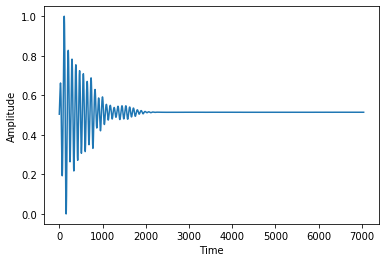

(32, 40, 1, 8064)
(32, 40)


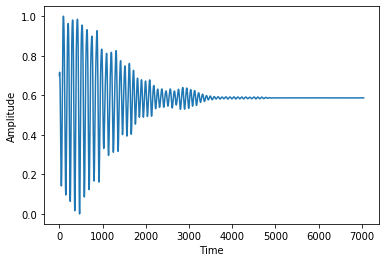

(32, 40, 1, 8064)
(32, 40)


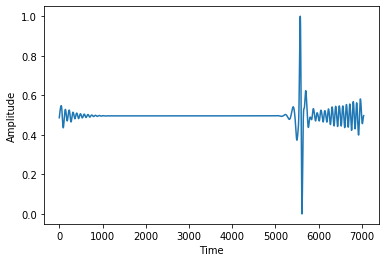

(32, 40, 1, 8064)
(32, 40)


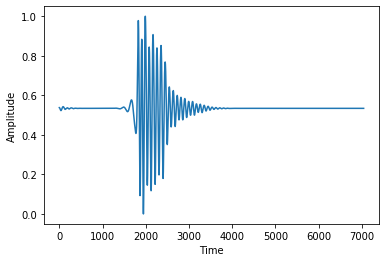

(32, 40, 1, 8064)
(32, 40)


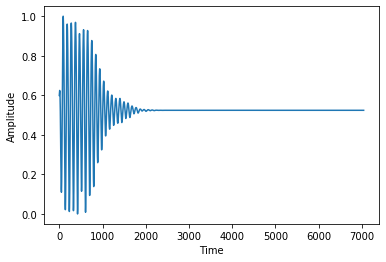

(32, 40, 1, 8064)
(32, 40)


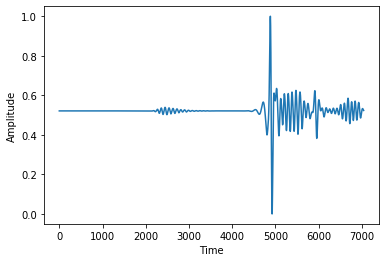

(32, 40, 1, 8064)
(32, 40)


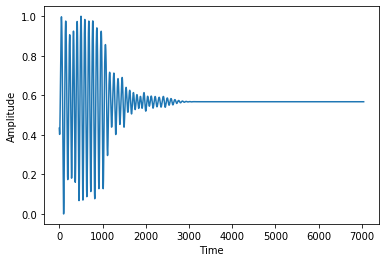

(32, 40, 1, 8064)
(32, 40)


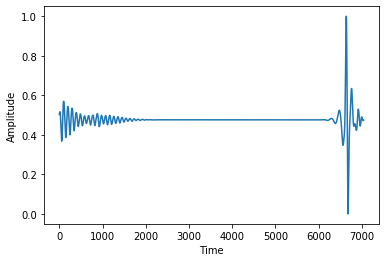

(32, 40, 1, 8064)
(32, 40)


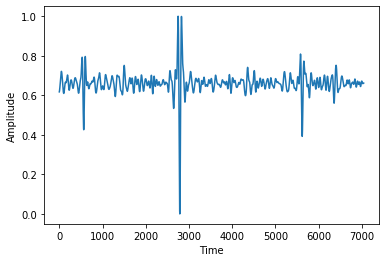

(32, 40, 1, 8064)
(32, 40)


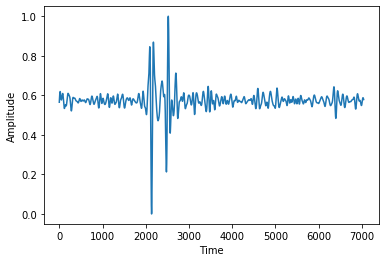

(32, 40, 1, 8064)
(32, 40)


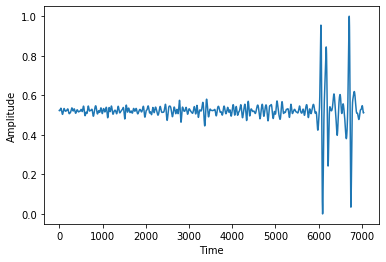

(32, 40, 1, 8064)
(32, 40)


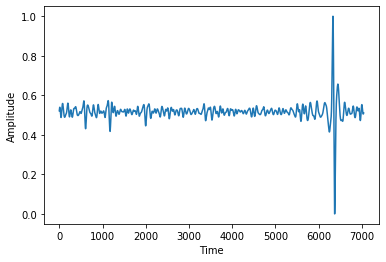

(32, 40, 1, 8064)
(32, 40)


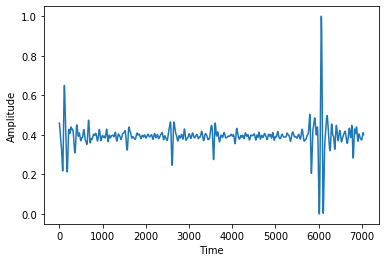

In [72]:
for error in error_data:
    plt.plot(plotting_deap_data(error[0],error[1]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
